Step #1 - DATA COLLECTING/IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
titanic = train_df.drop(columns=['PassengerId', 'Ticket','Cabin'])


Step #2 - EDA

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [4]:
titanic.shape

(891, 9)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
def bar_chart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True,figsize=(5,4))

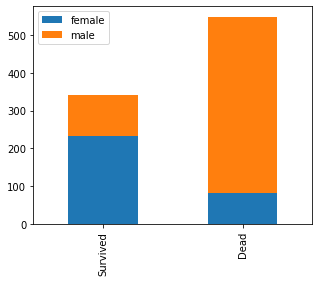

In [9]:
bar_chart('Sex')

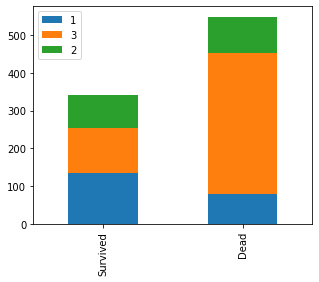

In [10]:
bar_chart('Pclass')

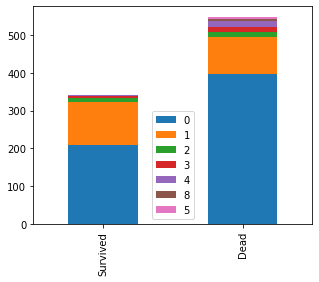

In [11]:
bar_chart('SibSp')

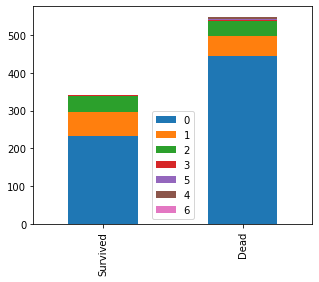

In [12]:
bar_chart('Parch')

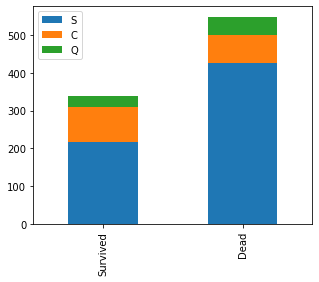

In [13]:
bar_chart('Embarked')

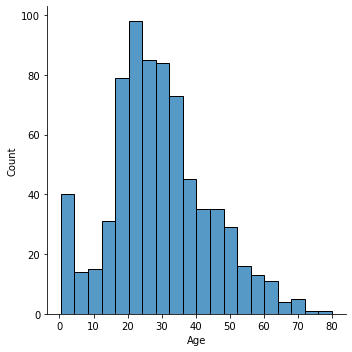

In [14]:
sns.displot(titanic['Age'])

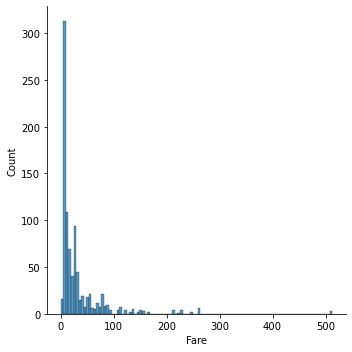

In [15]:
sns.displot(titanic['Fare']) 

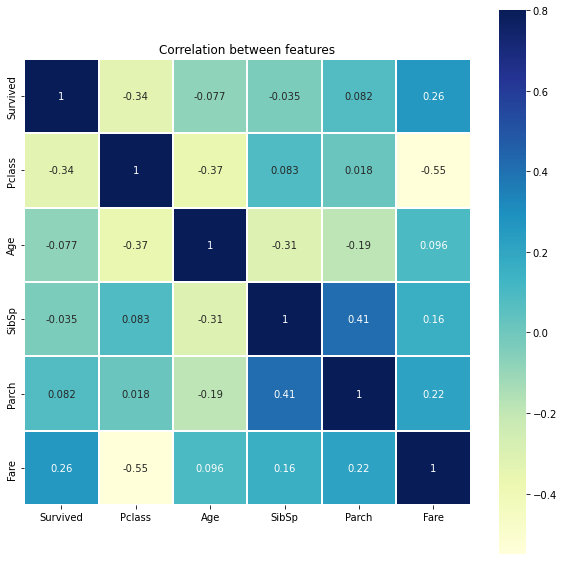

In [16]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [17]:
titanic.corr()["Survived"]

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [18]:
mean_age = titanic['Age'].mean()
mean_age

29.69911764705882

In [19]:
titanic['Age'].fillna(mean_age, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [20]:
embarked_mode = titanic['Embarked'].mode()
embarked_mode

0    S
Name: Embarked, dtype: object

In [21]:
titanic['Embarked'].fillna(embarked_mode.values[0], inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [23]:
titanic_num = train_df[['Age', 'SibSp', 'Parch', 'Fare']]
titanic_num.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [24]:
imputer.fit(titanic_num)

SimpleImputer()

In [25]:
imputer.statistics_

array([29.69911765,  0.52300786,  0.38159371, 32.20420797])

In [26]:
X = imputer.transform(titanic_num)
titanic_tr = pd.DataFrame(X, columns=titanic_num.columns, index=titanic_num.index)
titanic_tr.head()

,Age,SibSp,Parch,Fare
0,22.0,1.0,0.0,7.2500
1,38.0,1.0,0.0,71.2833
2,26.0,0.0,0.0,7.9250
3,35.0,1.0,0.0,53.1000
4,35.0,0.0,0.0,8.0500


Categorical imputer 

In [27]:
categorical_imputer = SimpleImputer(strategy="most_frequent")
titanic_categorical = train_df[["Embarked", "Sex", "Pclass"]]

categorical_imputer.fit(titanic_categorical)

SimpleImputer(strategy='most_frequent')

In [28]:
categorical_imputer.statistics_

array(['S', 'male', 3], dtype=object)

In [29]:
X = categorical_imputer.transform(titanic_categorical)
titanic_categorical_tr = pd.DataFrame(X, columns=titanic_categorical.columns, index=titanic_categorical.index)
titanic_categorical_tr.head()

,Embarked,Sex,Pclass
0,S,male,3
1,C,female,1
2,S,female,3
3,S,female,1
4,S,male,3


ORDINAL CLASSES

In [30]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

titanic_categorical_encoded = ordinal_encoder.fit_transform(titanic_categorical_tr)

In [31]:
titanic_categorical_encoded[:10]

array([[2., 1., 2.],
       [0., 0., 0.],
       [2., 0., 2.],
       [2., 0., 0.],
       [2., 1., 2.],
       [1., 1., 2.],
       [2., 1., 0.],
       [2., 1., 2.],
       [2., 0., 2.],
       [0., 0., 1.]])

In [32]:
ordinal_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object),
 array(['female', 'male'], dtype=object),
 array([1, 2, 3], dtype=object)]

ONE HOT ENCODER

In [33]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
embarked_encoder = OneHotEncoder()
# titanic_embarked_cat_encoded = np.expand_dims(titanic_cat_encoded[:,0], axis=1)
embarked_categorical_1hot = embarked_encoder.fit_transform(titanic_categorical_tr[['Embarked','Pclass']])
embarked_categorical_1hot

<891x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [34]:
embarked_categorical_1hot.toarray()

array([[0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.]])

In [35]:
embarked_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object), array([1, 2, 3], dtype=object)]

PIPELINE


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="mean")),
                         ('std_scaler', StandardScaler()),
])


embarked_pipeline = Pipeline([
                              ('imputer', SimpleImputer(strategy="most_frequent")),
                              ('categorical', OneHotEncoder()),
])

In [61]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age', 'SibSp', 'Parch', 'Fare']
ordinal_attribs = ['Sex']
categorical_attribs = ['Embarked', 'Pclass']

full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attribs),
                                   ('ord', OrdinalEncoder(), ordinal_attribs),
                                   ('categorical', embarked_pipeline, categorical_attribs),
])

titanic_prepared = full_pipeline.fit_transform(train_df)

In [62]:
modif_cols = ['Age','Parch','SibSp','Fare','Sex','Pclass1','Pclass2','Pclass3','Embarked1','Embarked2','Embarked3']
train_df_tr = pd.DataFrame(titanic_prepared, columns=modif_cols, index=train_df.index)
train_df_tr.head()

,Age,Parch,SibSp,Fare,Sex,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3
0,-0.592481,0.432793,-0.473674,-0.502445,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.638789,0.432793,-0.473674,0.786845,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.284663,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.407926,0.432793,-0.473674,0.420730,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.407926,-0.474545,-0.473674,-0.486337,1.0,0.0,0.0,1.0,0.0,0.0,1.0


TRAINING PART

In [39]:
X_train, X_test, y_train, y_test = train_test_split(titanic_prepared, train_df['Survived'], test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 11), (223, 11), (668,), (223,))

TESTING PART #1 - Stochastic Gradiant Descent classifier


In [40]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state=42)
SGD.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [41]:
f'Prediction: {SGD.predict([X_test[0,:]])[0]}, Actual: {y_test.values[0]}'

'Prediction: 0, Actual: 1'

In [42]:
SGD.score(X_test,y_test)

0.8071748878923767

CROSS VALIDATION

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGD, X_train, y_train, cv=3, scoring="accuracy")

array([0.74887892, 0.68609865, 0.76126126])

CONFUSION MATRIX

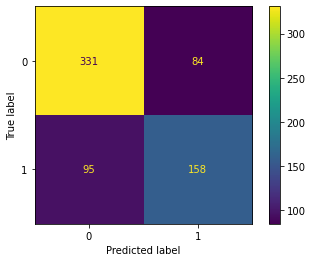

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(SGD, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize=None)

LOGISTICAL REGRESSION

In [60]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.predict(X_train, y_train)


ValueError: Found input variables with inconsistent numbers of samples: [668, 891]

In [57]:
results_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


RANDOM FOREST

In [46]:
clasification_tree = DecisionTreeClassifier(random_state=42)
cross_val_score(clasification_tree, X_train, y_train, cv=3, scoring="accuracy")

array([0.77130045, 0.73542601, 0.78378378])

In [47]:
clasification_forest = RandomForestClassifier(random_state=42)
cross_val_score(clasification_forest, X_train, y_train, cv=3, scoring="accuracy")

array([0.78923767, 0.76233184, 0.81081081])

TOTAL PREDICTION

In [48]:
y_train = train_df['Survived'].values
train_df.drop(columns=['Survived'], inplace=True)

titanic_prepared_train = full_pipeline.fit_transform(train_df)
titanic_prepared_test = full_pipeline.transform(test_df)

In [49]:
titanic_prepared_train.shape, titanic_prepared_test.shape

((891, 11), (418, 11))

In [50]:
clasification_forest.fit(titanic_prepared_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = clasification_forest.predict(titanic_prepared_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
results_df = pd.DataFrame(test_df['PassengerId'])
results_df['Survived'] = y_pred

In [53]:
results_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [54]:
results_df.to_csv('titanic_prediction_RF.csv', index=False)